# Lesson 5 DBSCAN Clustering

We are exploring another algorithm for clustering that is based on density of the points. In this notebook, we are comparing k-means vs. DBSCAN for an artificially generated data.


## Generating Artificial Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600, centers = 5)
rng = np.random.RandomState(74)

# transform the data to be stretched based on the random state - change the random state to change the shape
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

print(transformation)

# plot
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

[[ 0.60834549 -0.63667341]
 [-0.40887718  0.85253229]]


<Figure size 640x480 with 1 Axes>

## Running k-Means

Text(0, 0.5, 'Feature 1')

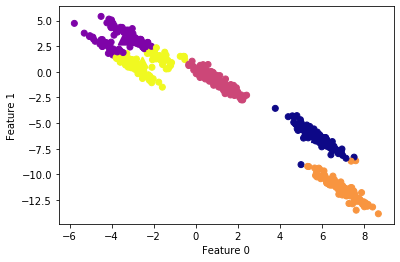

In [2]:
# cluster the data into five clusters
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_pred = kmeans.predict(X)
# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="plasma")
plt.scatter(kmeans.cluster_centers_[:, 0],   
            kmeans.cluster_centers_[:, 1],
            marker='^', 
            c=[0, 1, 2, 3, 4], 
            s=100, 
            linewidth=2,
            cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## Evaluation

Do you think that k-Means perform well in this case? Why/Why not?



## Running DBSCAN

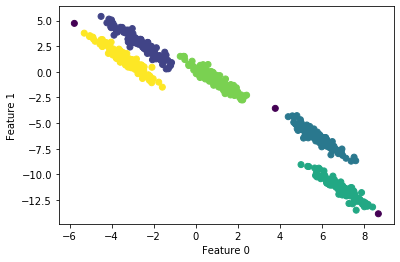

In [3]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# cluster the data
dbscan = DBSCAN(eps=0.123, min_samples = 2)
clusters = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=clusters,)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

plt.show()

In [4]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print(f'Number of clusters = {n_clusters_}')
print(f'Number of noise sample = {n_noise_}')

Number of clusters = 5
Number of noise sample = 3


In [5]:
from sklearn import metrics
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, clusters))
print("Completeness: %0.3f" % metrics.completeness_score(y, clusters))
print("V-measure: %0.3f" % metrics.v_measure_score(y, clusters))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, clusters))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y, clusters))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, clusters))

Estimated number of clusters: 5
Estimated number of noise points: 3
Homogeneity: 0.997
Completeness: 0.982
V-measure: 0.989
Adjusted Rand Index: 0.994
Adjusted Mutual Information: 0.982
Silhouette Coefficient: 0.553


C:\Users\yungh\Anaconda3\envs\sa48\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
